In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import regex as re
import emoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns
import csv
import langid
from chardet import detect
from spellchecker import SpellChecker
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [2]:
dataset = pd.read_csv('youtube_comments.csv')

In [3]:
dataset.head()

,text
0,"Hey Goodhumans, we hope you enjoy this episode..."
1,I feel like they should've found a girl who we...
2,Men’s rights vs feminism vs Derrick\n\nYou dec...
3,the other guys were probably like “godamn derr...
4,the fact that derrick was raised by a single m...


In [4]:
dataset.shape

(10000, 1)

In [5]:
dataset.dtypes

text    object
dtype: object

In [6]:
dataset.describe()

,text
count,10000
unique,9688
top,Yes
freq,17


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [8]:
dataset.isna().sum()

text    0
dtype: int64

# Data Preprocessing

In [9]:
#Double check for duplicates

print("Duplicate Comments:", len(dataset['text'])-len(dataset['text'].drop_duplicates()))

Duplicate Comments: 312


In [10]:
#Dropping of Duplicates and Reset of Index
dupes = dataset["text"]
dupes_listed = dataset[dupes.isin(dupes[dupes.duplicated()])].sort_values("text")
dataset.drop_duplicates(subset='text', keep="first", inplace=True)
dataset = dataset.reset_index()
dataset.drop(['index'], axis=1, inplace=True)
dataset

,text
0,"Hey Goodhumans, we hope you enjoy this episode..."
1,I feel like they should've found a girl who we...
2,Men’s rights vs feminism vs Derrick\n\nYou dec...
3,the other guys were probably like “godamn derr...
4,the fact that derrick was raised by a single m...
...,...
9683,@gsGs-xb6um What do you think toxic masculin...
9684,me when i lie
9685,@lesdaisydoo what
9686,He’s “incelcure” 😂


In [11]:
#Remove text that start with @ / These are youtube usernames
def remove_usernames(text):
    words = text.split()
    
    filtered_words = [word for word in words if not word.startswith('@')]
    
    cleaned_text = ' '.join(filtered_words)
    
    return cleaned_text


dataset['text'] = dataset['text'].apply(remove_usernames)

In [16]:
#Remove non-alphanumeric characters, spaces & links
def clean_text(text):
    text = text.replace('?', ' ').replace('!', ' ').replace('_', ' ') # Remove question marks, exclamation points, underscores
    text = ' '.join([word for word in text.split() if not word.startswith('@')]) # Remove mention tags
    text = text.replace('\n', ' ') # Remove newline characters

    # Remove all non-alphanumeric characters except hashtags, underscores, and spaces
    text = re.sub(r'[^a-zA-Z0-9_#\s]', '', text)
    
    text = text.replace('...', ' ') # Remove ellipses
    text = ' '.join(text.split()) # Replace multiple spaces with a single space
    text = text.strip() # Remove leading/trailing spaces
    return text

dataset['text'] = dataset['text'].apply(clean_text)
print(dataset)

                                                   text
0     Hey Goodhumans we hope you enjoy this episode ...
1     I feel like they shouldve found a girl who wen...
2         Mens rights vs feminism vs Derrick You decide
3     the other guys were probably like godamn derri...
4     the fact that derrick was raised by a single m...
...                                                 ...
9683      What do you think toxic masculinity refers to
9684                                      me when i lie
9685                                               what
9686                                      Hes incelcure
9687                            Provide an example then

[9688 rows x 1 columns]


In [17]:
#Check for Duplicate Tweets after cleaning of non-alphanumeric characters, spaces & links
print("Duplicate Tweets:", len(dataset['text'])-len(dataset['text'].drop_duplicates()))

Duplicate Tweets: 298


In [18]:
dupes_2 = dataset["text"]
dupes_listed2 = dataset[dupes_2.isin(dupes_2[dupes_2.duplicated()])].sort_values("text")
print(dupes_listed2)

              text
8226              
3140              
8135              
2852              
8256              
...            ...
721   yes they can
6867  yes they can
7620         yikes
7619         yikes
1558         yikes

[419 rows x 1 columns]


In [20]:
# Drop the blank rows

dataset.replace('', pd.NA, inplace=True)
dataset.dropna(inplace=True)
print(dataset)

                                                   text
0     Hey Goodhumans we hope you enjoy this episode ...
1     I feel like they shouldve found a girl who wen...
2         Mens rights vs feminism vs Derrick You decide
3     the other guys were probably like godamn derri...
4     the fact that derrick was raised by a single m...
...                                                 ...
9683      What do you think toxic masculinity refers to
9684                                      me when i lie
9685                                               what
9686                                      Hes incelcure
9687                            Provide an example then

[9616 rows x 1 columns]


In [22]:
# Drop duplicate tweets

dataset.drop_duplicates(subset='text', keep="first", inplace=True)
print(dataset)

                                                   text
0     Hey Goodhumans we hope you enjoy this episode ...
1     I feel like they shouldve found a girl who wen...
2         Mens rights vs feminism vs Derrick You decide
3     the other guys were probably like godamn derri...
4     the fact that derrick was raised by a single m...
...                                                 ...
9682                                    fixed the issue
9683      What do you think toxic masculinity refers to
9684                                      me when i lie
9686                                      Hes incelcure
9687                            Provide an example then

[9389 rows x 1 columns]


In [23]:
# Reset column index

dataset = dataset.reset_index()

In [24]:
# Drop old index column 
dataset.drop(['index'], axis=1, inplace=True)
dataset

,text
0,Hey Goodhumans we hope you enjoy this episode ...
1,I feel like they shouldve found a girl who wen...
2,Mens rights vs feminism vs Derrick You decide
3,the other guys were probably like godamn derri...
4,the fact that derrick was raised by a single m...
...,...
9384,fixed the issue
9385,What do you think toxic masculinity refers to
9386,me when i lie
9387,Hes incelcure


In [25]:
# Detect language used / Drop if it is not in English

from langdetect import detect

def keep_eng(df, column):

    def is_english(text):
        try:
            return detect(text) == 'en'
        except:
            return False

    df['is_english'] = df[column].apply(is_english)
    english_df = df[df['is_english']]
    english_df.drop(columns=['is_english'], inplace=True)
    return english_df

dataset['text'] = keep_eng(dataset,'text')
print(dataset)

                                                   text  is_english
0     Hey Goodhumans we hope you enjoy this episode ...        True
1     I feel like they shouldve found a girl who wen...        True
2                                                   NaN       False
3     the other guys were probably like godamn derri...        True
4     the fact that derrick was raised by a single m...        True
...                                                 ...         ...
9384                                    fixed the issue        True
9385      What do you think toxic masculinity refers to        True
9386                                      me when i lie        True
9387                                      Hes incelcure        True
9388                            Provide an example then        True

[9389 rows x 2 columns]


C:\Users\casti\AppData\Local\Temp\ipykernel_7172\4015923967.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_df.drop(columns=['is_english'], inplace=True)


In [26]:
#Drop non-english rows
dataset= dataset[dataset['is_english']]
print(dataset)

                                                   text  is_english
0     Hey Goodhumans we hope you enjoy this episode ...        True
1     I feel like they shouldve found a girl who wen...        True
3     the other guys were probably like godamn derri...        True
4     the fact that derrick was raised by a single m...        True
5     I cant believe Men and woman are different but...        True
...                                                 ...         ...
9384                                    fixed the issue        True
9385      What do you think toxic masculinity refers to        True
9386                                      me when i lie        True
9387                                      Hes incelcure        True
9388                            Provide an example then        True

[8147 rows x 2 columns]


In [27]:
# Reset and drop old column
dataset = dataset.reset_index()
dataset.drop(['index'], axis=1, inplace=True)
dataset

,text,is_english
0,Hey Goodhumans we hope you enjoy this episode ...,True
1,I feel like they shouldve found a girl who wen...,True
2,the other guys were probably like godamn derri...,True
3,the fact that derrick was raised by a single m...,True
4,I cant believe Men and woman are different but...,True
...,...,...
8142,fixed the issue,True
8143,What do you think toxic masculinity refers to,True
8144,me when i lie,True
8145,Hes incelcure,True


In [28]:
#Tokenization

dataset['tokenized_comments'] = dataset['text'].apply(lambda x: word_tokenize(x))

dataset['tokenized_comments']

0       [Hey, Goodhumans, we, hope, you, enjoy, this, ...
1       [I, feel, like, they, shouldve, found, a, girl...
2       [the, other, guys, were, probably, like, godam...
3       [the, fact, that, derrick, was, raised, by, a,...
4       [I, cant, believe, Men, and, woman, are, diffe...
                              ...                        
8142                                  [fixed, the, issue]
8143    [What, do, you, think, toxic, masculinity, ref...
8144                                   [me, when, i, lie]
8145                                     [Hes, incelcure]
8146                         [Provide, an, example, then]
Name: tokenized_comments, Length: 8147, dtype: object

In [29]:
# Case Transformation
# Function to transform tokenized tweets to lowercase
def lowercase_tokens(tokens):
    return [token.lower() for token in tokens]

dataset['tokenized_comments'] = dataset['tokenized_comments'].apply(lambda x: lowercase_tokens(x))
print(dataset['tokenized_comments'])

0       [hey, goodhumans, we, hope, you, enjoy, this, ...
1       [i, feel, like, they, shouldve, found, a, girl...
2       [the, other, guys, were, probably, like, godam...
3       [the, fact, that, derrick, was, raised, by, a,...
4       [i, cant, believe, men, and, woman, are, diffe...
                              ...                        
8142                                  [fixed, the, issue]
8143    [what, do, you, think, toxic, masculinity, ref...
8144                                   [me, when, i, lie]
8145                                     [hes, incelcure]
8146                         [provide, an, example, then]
Name: tokenized_comments, Length: 8147, dtype: object


In [30]:
#Check Spelling

def check_spelling(tokens):
    spell = SpellChecker()
    corrected_tokens = []
    for token in tokens:
        # Check if the token is misspelled
        if spell.unknown([token]):
            corrected_token = spell.correction(token)
            if corrected_token is not None and corrected_token.strip():  # Check if corrected_token is not None
                corrected_tokens.append(corrected_token.strip())  # Append the corrected token
        else:
            corrected_tokens.append(token)  # Keep the original token if it's not misspelled
    return corrected_tokens

dataset['corrected_tokens'] = dataset['tokenized_comments'].apply(check_spelling)
print(dataset)


                                                   text  is_english  \
0     Hey Goodhumans we hope you enjoy this episode ...        True   
1     I feel like they shouldve found a girl who wen...        True   
2     the other guys were probably like godamn derri...        True   
3     the fact that derrick was raised by a single m...        True   
4     I cant believe Men and woman are different but...        True   
...                                                 ...         ...   
8142                                    fixed the issue        True   
8143      What do you think toxic masculinity refers to        True   
8144                                      me when i lie        True   
8145                                      Hes incelcure        True   
8146                            Provide an example then        True   

                                     tokenized_comments  \
0     [hey, goodhumans, we, hope, you, enjoy, this, ...   
1     [i, feel, like, they, s

In [31]:
# Get the total number of Ordinal Values
import re

def count_ordinals_in_tokens(tokens):
    ordinal_pattern = r'\d+(st|nd|rd|th)'
    ordinals = [match for token in tokens for match in re.findall(ordinal_pattern, token)]
    return len(ordinals)
cor_tokens = [token for tokens in dataset["corrected_tokens"] for token in tokens]

total_ordinal_count = count_ordinals_in_tokens(cor_tokens)
print(f"Total Count of Ordinals in 'corrected_tokens' Column: {total_ordinal_count}")

Total Count of Ordinals in 'corrected_tokens' Column: 0


In [32]:
# Remove Stopwords
stopwords_df = pd.read_csv('stopwords.csv')
combined_stopwords = set(stopwords_df['Stopword'])

filtered_word_lists = []

for tokens in dataset['corrected_tokens']:
    if isinstance(tokens,list):
        filtered_tokens = [word for word in tokens if word not in combined_stopwords]
        filtered_word_lists.append(filtered_tokens)
    else:
        filtered_word_lists.append([])

dataset['corrected_tokens'] = filtered_word_lists


In [33]:
# Remove Numbers

def remove_numbers_and_blank_spaces(tokens):
    number_pattern = r'\d+'
    tokens_without_numbers = []
    
    for token in tokens:
        token_without_numbers = re.sub(number_pattern, '', token).strip()
        if token_without_numbers:
            tokens_without_numbers.append(token_without_numbers)
    
    return tokens_without_numbers

In [34]:
#Lemmatization

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def preprocess_text(text):
    # Apply lemmatization
    lemmatized_tokens = lemmatize_tokens(text)
    
    # Remove numbers and hashtags
    tokens_without_numbers = remove_numbers_and_blank_spaces(lemmatized_tokens)
    
    cleaned_text = ', '.join(tokens_without_numbers)
    
    return cleaned_text

dataset['corrected_tokens'] = dataset['corrected_tokens'].apply(preprocess_text)
print(dataset['corrected_tokens'])

0       hey, hope, enjoy, episode, hope, spark, meanin...
1              feel, shouldve, girl, men, right, feminist
2                         guy, godamn, derrick, quit, bad
3       derrick, raised, single, mother, acted, genuin...
4           woman, equal, actual, prompt, basic, humanity
                              ...                        
8142                                         fixed, issue
8143                           toxic, masculinity, refers
8144                                                  lie
8145                                             insecure
8146                                              provide
Name: corrected_tokens, Length: 8147, dtype: object


In [35]:
#Remove whitespaces from Corrected Words Column
dataset['corrected_tokens'] = dataset['corrected_tokens'].str.strip()
dataset

,text,is_english,tokenized_comments,corrected_tokens
0,Hey Goodhumans we hope you enjoy this episode ...,True,"[hey, goodhumans, we, hope, you, enjoy, this, ...","hey, hope, enjoy, episode, hope, spark, meanin..."
1,I feel like they shouldve found a girl who wen...,True,"[i, feel, like, they, shouldve, found, a, girl...","feel, shouldve, girl, men, right, feminist"
2,the other guys were probably like godamn derri...,True,"[the, other, guys, were, probably, like, godam...","guy, godamn, derrick, quit, bad"
3,the fact that derrick was raised by a single m...,True,"[the, fact, that, derrick, was, raised, by, a,...","derrick, raised, single, mother, acted, genuin..."
4,I cant believe Men and woman are different but...,True,"[i, cant, believe, men, and, woman, are, diffe...","woman, equal, actual, prompt, basic, humanity"
...,...,...,...,...
8142,fixed the issue,True,"[fixed, the, issue]","fixed, issue"
8143,What do you think toxic masculinity refers to,True,"[what, do, you, think, toxic, masculinity, ref...","toxic, masculinity, refers"
8144,me when i lie,True,"[me, when, i, lie]",lie
8145,Hes incelcure,True,"[hes, incelcure]",insecure


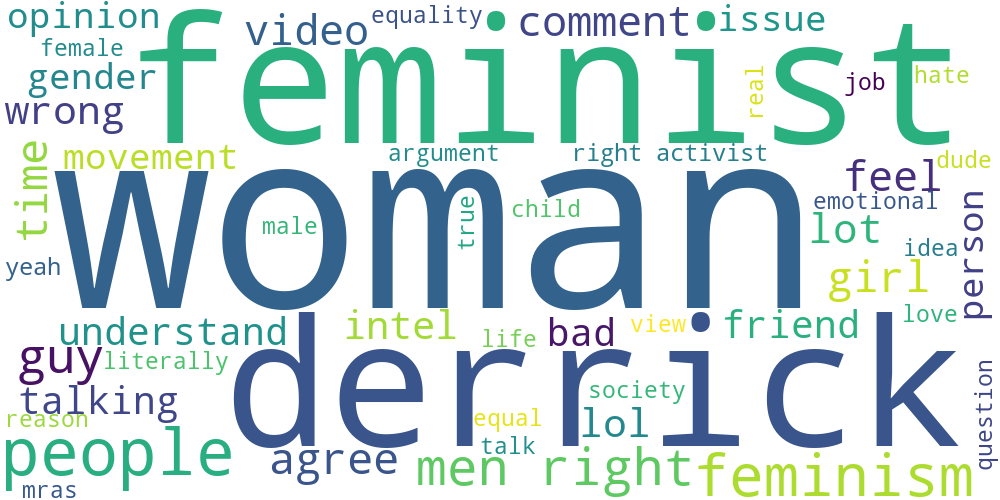

In [36]:
from wordcloud import WordCloud

long_string = ','.join(list(dataset['corrected_tokens'].values))
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue',width=1000, height=500)
wordcloud.generate(long_string)
wordcloud.to_image()

# Sentiment Analysis

In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [38]:
analyzer = SentimentIntensityAnalyzer()

def sentiment_scores(tokens):
    if not tokens:
        return 0.0

    total_score = 0
    for token in tokens:
        score = analyzer.polarity_scores(token)["compound"]
        total_score += score
    avg_score = total_score / len(tokens)
    return avg_score

dataset['Sentiment_Scores'] = dataset['corrected_tokens'].apply(sentiment_scores)
print(dataset['Sentiment_Scores'])

0       0.017922
1       0.032771
2       0.000000
3       0.016993
4       0.020391
          ...   
8142    0.000000
8143    0.017646
8144    0.152933
8145    0.000000
8146    0.000000
Name: Sentiment_Scores, Length: 8147, dtype: float64


In [39]:
def sentiment_label(score):
    if score > 0:
        label = "Positive"
    elif score < 0:
        label = "Negative"
    else:
        label = "Neutral"
    
    return label

dataset["Sentiment_Label"] = dataset["Sentiment_Scores"].apply(sentiment_label)

dataset.head()

,text,is_english,tokenized_comments,corrected_tokens,Sentiment_Scores,Sentiment_Label
0,Hey Goodhumans we hope you enjoy this episode ...,True,"[hey, goodhumans, we, hope, you, enjoy, this, ...","hey, hope, enjoy, episode, hope, spark, meanin...",0.017922,Positive
1,I feel like they shouldve found a girl who wen...,True,"[i, feel, like, they, shouldve, found, a, girl...","feel, shouldve, girl, men, right, feminist",0.032771,Positive
2,the other guys were probably like godamn derri...,True,"[the, other, guys, were, probably, like, godam...","guy, godamn, derrick, quit, bad",0.000000,Neutral
3,the fact that derrick was raised by a single m...,True,"[the, fact, that, derrick, was, raised, by, a,...","derrick, raised, single, mother, acted, genuin...",0.016993,Positive
4,I cant believe Men and woman are different but...,True,"[i, cant, believe, men, and, woman, are, diffe...","woman, equal, actual, prompt, basic, humanity",0.020391,Positive


# Visualization

In [40]:
sentiment_count = dataset['Sentiment_Label'].value_counts()
colors = {'Positive':'lightgreen','Neutral':'lightgray', 'Negative':'lightcoral'}
print(sentiment_count)

Sentiment_Label
Positive    5797
Neutral     2350
Name: count, dtype: int64


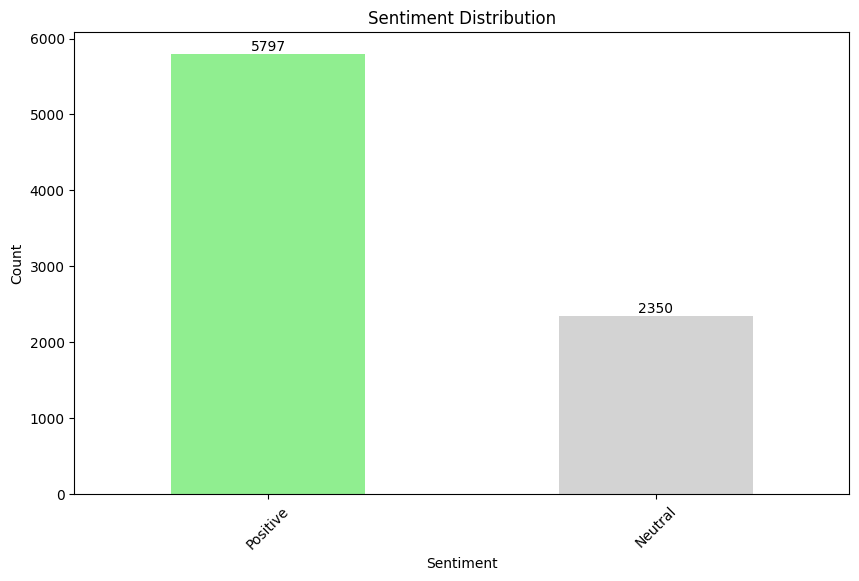

In [42]:
plt.figure(figsize=(10, 6))
sentiment_count.plot(kind='bar', color=[colors.get(x, 'lightgray') for x in sentiment_count.index])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

for i, count in enumerate(sentiment_count):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()